# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict wether or not they have heart disease?

## 2. Data

Original data available on Kagge: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
Since it's concerning health, we want a very accurate model.

> If we can reach 95% accuracy at predicting wether or not a patient has heart disease during the proof of concept, we'll pursure the project.

## 4. Features

This is where you'll get different features about each of the features in your data.

Data dictionary:
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restmcg (resting electrocardiographic results)
- -- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute

## Preparing the tools

We're going to use pandas, Matplotlib, and Numpy for data analysis and manipulation.

In [76]:
# Import all the needed tools

# Regular EDA (exploraritory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from SCikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
heart_disease_df = pd.read_csv('heart-disease.csv')
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease_df.shape

(303, 14)

## Data Explorartion (EDA)

The goal s to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing fro the data and how do you deal with it?
4. WHere are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data?

In [4]:
# Let's find out out how many of each class there are
heart_disease_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

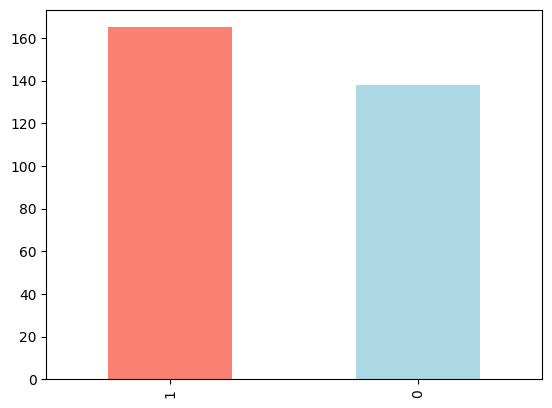

In [5]:
#  Visualize the value counts
heart_disease_df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [6]:
# Let's look at differnet information about the df
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# More details - numerical values
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [9]:
# More males than females
heart_disease_df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with Sex column with crosstab()
pd.crosstab(heart_disease_df['target'], heart_disease_df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


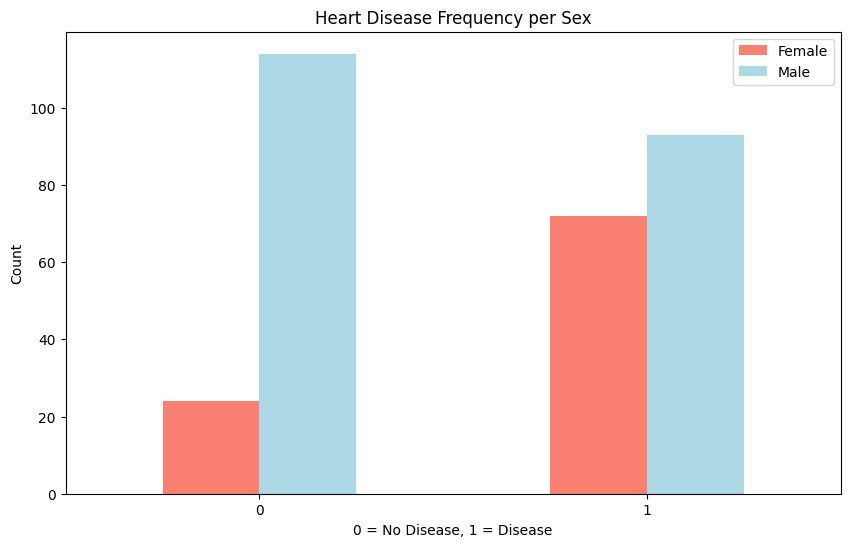

In [11]:
# Create a plot of crosstab
pd.crosstab(heart_disease_df['target'], heart_disease_df['sex']).plot(kind='bar',
                                                                     figsize=(10,6),
                                                                     color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency per Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [12]:
# Let's try to combine some of the features and compare to target variable
heart_disease_df['thalach'].value_counts() # has too many differnt types (length) for a bar grapgh. Scatter is better option.

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

To compare three e need to create a figure with two plots on them.

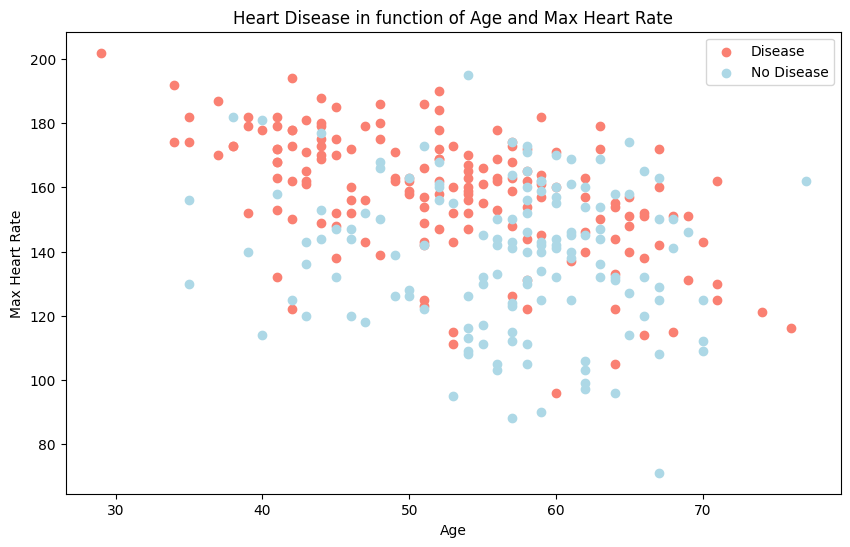

In [13]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with positive target examples
plt.scatter(heart_disease_df['age'][heart_disease_df['target'] == 1], # all the age rows where target == 1
           heart_disease_df['thalach'][heart_disease_df['target'] == 1], # all the thalach rows where target == 1
           c='salmon') ;


# Scatter with negative target examples
plt.scatter(heart_disease_df['age'][heart_disease_df['target'] == 0], # all the age rows where target == 0
           heart_disease_df['thalach'][heart_disease_df['target'] == 0], # all the thalach rows where target == 0
           c='lightblue') ;

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

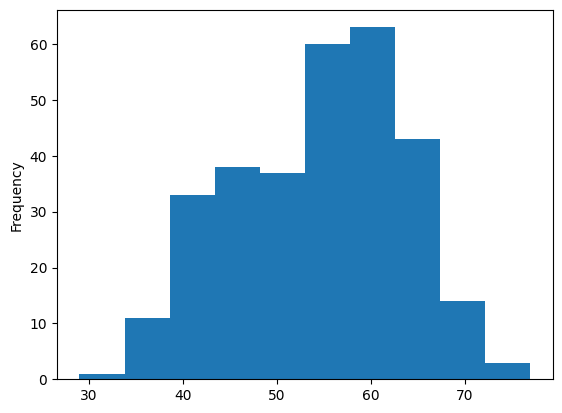

In [14]:
# Check the distribution (spread) of the age colun with a histogram
heart_disease_df['age'].plot.hist(); # appeas to be a normal distribution (good way to find outliers)

### Heart Disease Frequency per Chest Pain Type

In [15]:
pd.crosstab(heart_disease_df['cp'], heart_disease_df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


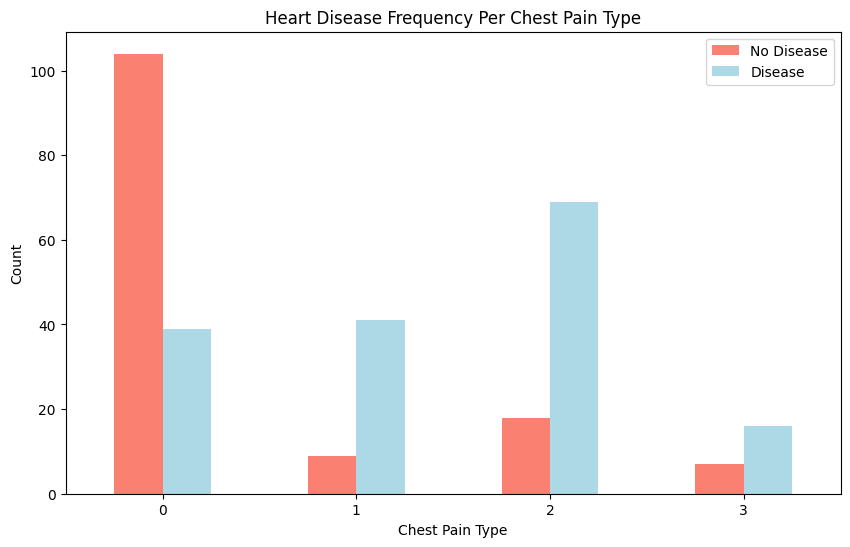

In [16]:
# Make crosstab more visual
pd.crosstab(heart_disease_df['cp'], heart_disease_df['target']).plot(kind='bar',
                                                                    figsize=(10,6),
                                                                    color=['salmon', 'lightblue'])
# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
# This will see how all the features are related to each other (positive/negative correlation)

heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


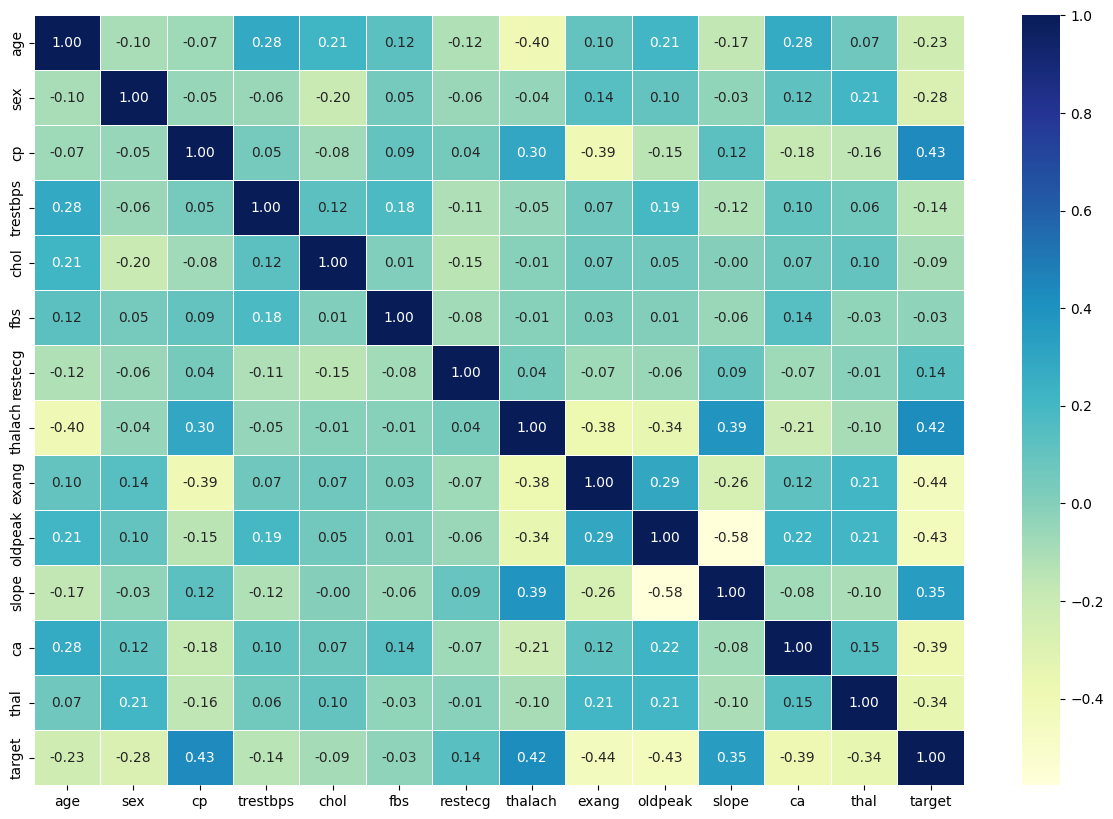

In [18]:
# Lets make our correlation matrix nicer
corr_matrix = heart_disease_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

## 5. Modeling

In [19]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#  Split data into X and y

X = heart_disease_df.drop('target', axis=1)
y = heart_disease_df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [47]:
# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Now we've got our data split into train and test sets at 80% for each. It's time to build a ML model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going  to try 3 different models:
1. Logistic Regression
2. K-Nearest Neighbors CLassifier
3. Random Forest Classifier

(Based on sklearn map)

In [48]:
#  Put models in a dict to test all at once in a funcyion
np.random.seed(42)

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#  Create a function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) 
        model_scores[name] = score
    return model_scores   

In [51]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

/Users/kathytavia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison visualized

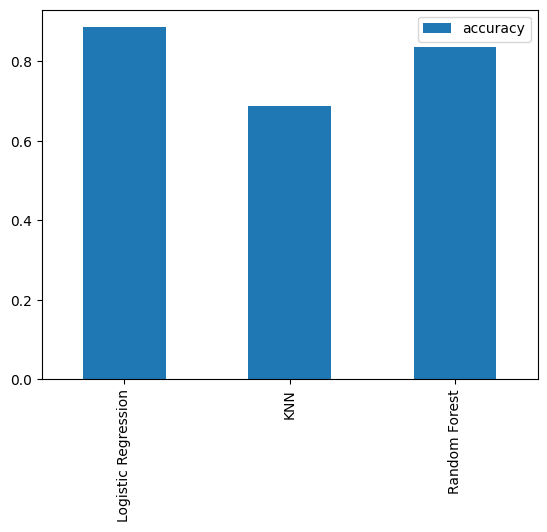

In [52]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); # Transpose because looks strange & focus on accuracy

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following (for classification):
- Hyperparemeter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- ROC Curve
- Area under the curve (AUC)

### 1.1 Hyperparemeter tuning (by hand)

In [53]:
# Let's tune KNN model
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors (default is 5)
neighbors = range(1,21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through diffrent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [54]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [55]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


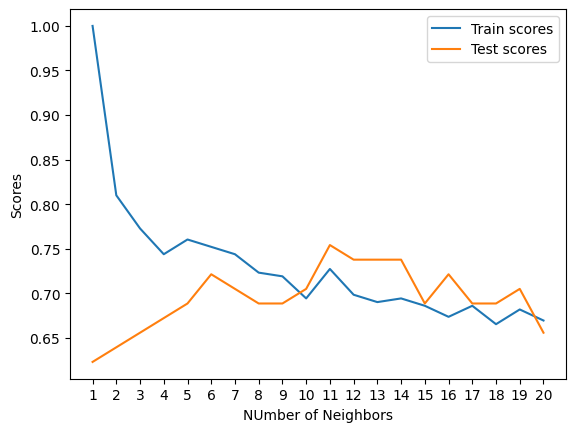

In [56]:
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xlabel('NUmber of Neighbors')
plt.ylabel('Scores')
plt.xticks(np.arange(1,21,1))
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

KNN increased so the tuning wasn't very successful. We can scrap this model. Also doing a for loop is not very efficient so for the next we will try a RandomizedSearchCV instead.

### 1. 2 Hyperparemeter tuning with RandomizedSearchCV

We're going to tune:
- LogisticRegresion()
- RandomForestClassifier()

...using RanomizedSearchCV


Model scores to increase:

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.819672131147541}

In [57]:
# Create a hyperparameter grid for LogisitcRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparameter grids set up for each of our remainng models. Let's tune them using RanomizedSearchCV.

In [58]:
# Tune LogisitcRegression
np.random.seed(42)

# Set up hyperparameter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(), #instantiated model
                               param_distributions=log_reg_grid, # grid of parameters to adjust
                               cv=5, # number of cross validations
                               n_iter=20, # try 20 different combinations
                               verbose=True)

# Fit random hyperparameter search model for LogisiticRegresion
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
# Check for the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier.

In [61]:
np.random.seed(42)

rs_rand_forest = RandomizedSearchCV(RandomForestClassifier(),
                                   param_distributions=rf_grid,
                                   cv=5,
                                   n_iter=20,
                                   verbose=True)

rs_rand_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
rs_rand_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [63]:
rs_rand_forest.score(X_test, y_test)

0.8688524590163934

In [64]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### 1.3 Hyperparameter tuning using GridSearchCV

Since our RandomForest model provides the best score so far, we'll try and improve them again using GridSearchCV.

In [65]:
# Different hyperparameters for our RandomForest
np.random.seed(42)

# rf_grid = {'n_estimators': np.arange(10,451,50),
#           'max_depth': [None],
#           'min_samples_split': np.arange(2,13,2),
#           'min_samples_leaf': np.arange(1,16,2)}

# gs_rf = GridSearchCV(RandomForestClassifier(),
#                      param_grid=rf_grid,
#                      cv=5,
#                      verbose=True
#                     )

log_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}

gs_log = GridSearchCV(LogisticRegression(),
                     param_grid=log_grid,
                     cv=5,
                     verbose=True
                    )

gs_log.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [67]:
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [68]:
gs_log.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machie learning classifier beyond Accuracy

- ROC curve and AUC score
- Confusion matrix
- CLassification report
- Precision 
- Recall
- F1-score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [69]:
# Make predictions with tuned model
y_preds = gs_log.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

/Users/kathytavia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


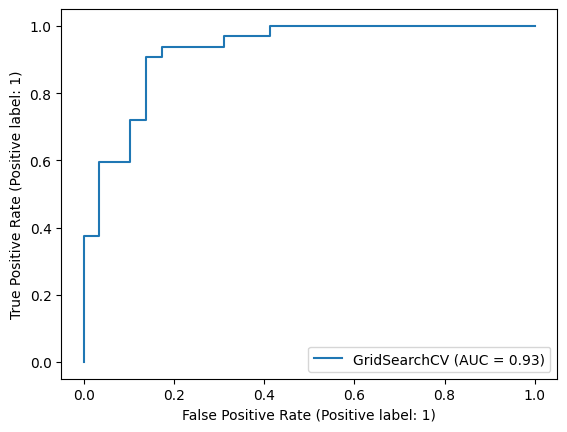

In [72]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log, X_test, y_test)

In [75]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


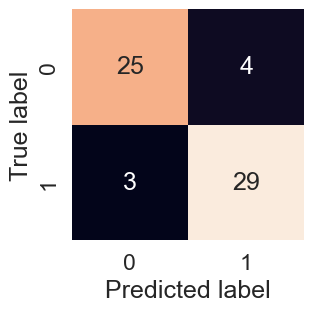

In [77]:
# Visualize confusion matric
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric, and a confusion matrix...let's get a classification report as well as cross-validated, recall, and f1-score.

### Classification report

In [80]:
# Problem is that these results are just on the 20% test data
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall, and f1-score. of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [81]:
# Check best hyperparameters
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [82]:
# Create new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [89]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)

In [90]:
# Cross-validated  Precision
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_pre = np.mean(cv_pre)

In [91]:
# Cross-validated  Recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)

In [92]:
# Cross-validated  F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)

<AxesSubplot:title={'center':'Cross-validated CLassificationMetrics'}>

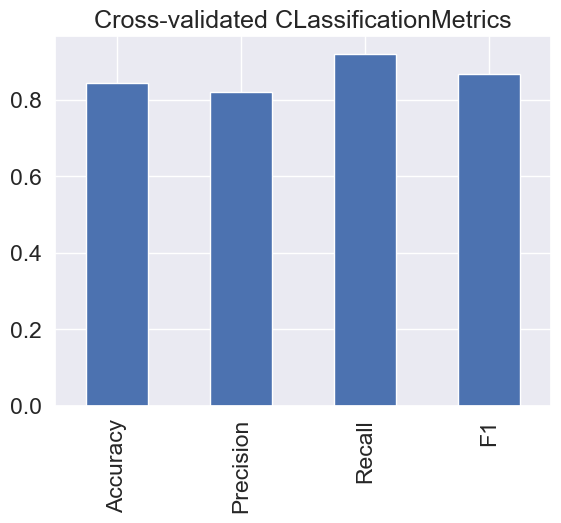

In [99]:
# Visualize cross-validated matrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_pre,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated CLassificationMetrics', legend=False)

### Feature Importance

It's another way of asking which features contributed most to the outcome of the model and how did they contribute?

Finding feaure importance is different for each ML model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression model.

In [100]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [101]:
# Check coef_ (correlation)
clf.coef_

array([[ 0.00316728, -0.86044662,  0.66067038, -0.01156993, -0.00166374,
         0.04386106,  0.31275853,  0.02459361, -0.60413087, -0.56862799,
         0.4505163 , -0.63609901, -0.67663377]])

In [103]:
# Match coef of features to columns
feature_dict = dict(zip(heart_disease_df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672816664025417,
 'sex': -0.8604466164764594,
 'cp': 0.660670378971457,
 'trestbps': -0.011569931858994414,
 'chol': -0.0016637446649201797,
 'fbs': 0.04386106245399992,
 'restecg': 0.31275852888688666,
 'thalach': 0.024593614591211826,
 'exang': -0.6041308666006405,
 'oldpeak': -0.5686279913648149,
 'slope': 0.45051630416484045,
 'ca': -0.636099010407402,
 'thal': -0.6766337677461476}

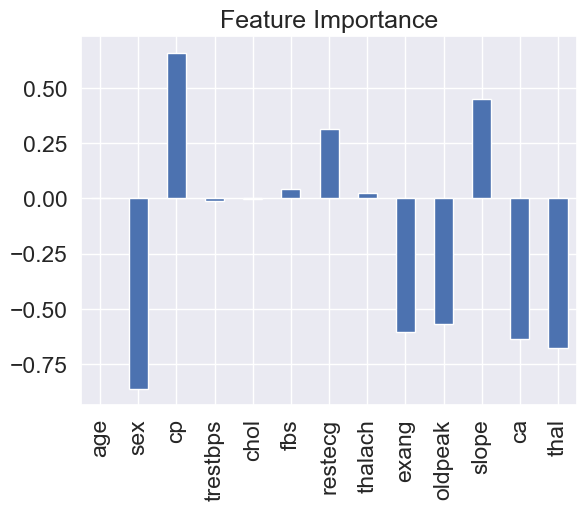

In [107]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [108]:
pd.crosstab(heart_disease_df['sex'],heart_disease_df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [109]:
pd.crosstab(heart_disease_df['slope'],heart_disease_df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
